# 分散分析
ここでは３つ以上の平均値を比較するための統計的方法として、分散分析を紹介する。

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('../data/teaching_method.csv')

In [4]:
data.head()

,id,name,sex,math,stats,psychology_test,stats_test1,stats_test2,teaching_method
0,1,大村,男,嫌い,好き,13,6,10,C
1,2,本多,男,嫌い,好き,14,10,13,B
2,3,川崎,男,好き,好き,7,6,8,B
3,4,多村,男,好き,好き,12,10,15,A
4,5,松中,男,嫌い,嫌い,10,5,8,B


In [5]:
A = data[data.teaching_method == 'A']
B = data[data.teaching_method == 'B']
C = data[data.teaching_method == 'C']
D = data[data.teaching_method == 'D']

In [6]:
A

,id,name,sex,math,stats,psychology_test,stats_test1,stats_test2,teaching_method
3,4,多村,男,好き,好き,12,10,15,A
6,7,柴原,男,嫌い,嫌い,8,5,9,A
10,11,高谷,女,好き,好き,9,11,18,A
11,12,杉内,女,嫌い,好き,6,6,14,A
12,13,和田,女,好き,好き,10,11,18,A


In [7]:
B

,id,name,sex,math,stats,psychology_test,stats_test1,stats_test2,teaching_method
1,2,本多,男,嫌い,好き,14,10,13,B
2,3,川崎,男,好き,好き,7,6,8,B
4,5,松中,男,嫌い,嫌い,10,5,8,B
14,15,大隣,女,嫌い,好き,5,7,12,B
18,19,佐藤,女,嫌い,嫌い,12,7,7,B


In [8]:
C

,id,name,sex,math,stats,psychology_test,stats_test1,stats_test2,teaching_method
0,1,大村,男,嫌い,好き,13,6,10,C
5,6,小久保,男,嫌い,嫌い,6,3,6,C
13,14,新垣,女,嫌い,嫌い,12,9,11,C
16,17,斎藤,女,嫌い,嫌い,8,8,7,C
17,18,柳瀬,女,嫌い,嫌い,8,7,12,C


In [9]:
D

,id,name,sex,math,stats,psychology_test,stats_test1,stats_test2,teaching_method
7,8,井手,男,嫌い,嫌い,15,9,10,D
8,9,田上,男,嫌い,嫌い,4,3,7,D
9,10,松田,男,好き,嫌い,14,3,3,D
15,16,水田,女,好き,嫌い,12,5,5,D
19,20,馬原,女,嫌い,嫌い,15,9,7,D


上記の表は指導法（４つの指導法で計20人）ごとの点数を表示してる。 ここでは20人の得点そのものではなく、それぞれの指導法をうける全ての母集団としたときに、その母集団において、それぞれの指導法ごとに求めたテスト得点の平均値に違いがあるかどうかということに関心があるとする。母集団ではこれら４つの指導法の間に平均値の差はあるのか？標本の群間で平均値の差はあると言っても、母集団で平均値に差があるとは必ずしも言えない。<b>この得られた標本が母平均の等しい4群から抽出される可能性が高いかどうかを検討するための検定が分散分析である。</b>分散分析という名前だが、平均値差の検定である（t検定は３つ以上の平均値差の検定には使えない）。

## 一元配置分散分析（対応なし）を実行する
統計的仮説検定の一般的な手順の通りに分散分析を実行する。分散分析は今まで検定とは複雑な計算のためライブラリを使って計算する。

### (1)帰無仮説と対立仮説の設定
- 帰無仮説$H_0$：4群の母平均は等しい（指導法の違いによる統計学の学習効果に差はない）
- 対立仮説$H_1$：4群の母平均は等しくない（指導法の違いによる統計学の学習効果に差がある）
<p>
ここで注意しなければならないのは、例えば4群のうち一つだけ母平均と異なる（その他３つは母平均と等しい）ような場合でも対立仮説が成立することである。
</p>

### (2)検定統計量の選択
分散分析では検定統計量として次のFを利用する
$$
F = \frac{群間平方和/群間の自由度}{群内平方和/群内の自由度}
$$
この検定統計量は帰無仮説のもとで、すなわち全ての群の母平均が等しいときにはF分布という確率分布に従う。F分布は自由度を２つ持つ。これは$df_1$と$df_2$と書かれたり、分子の自由度、分母の自由度と呼ばれたりする。F分布を書いてみる。下記は分子の自由度を3、分母の自由度を16のF分布を描いたものである。

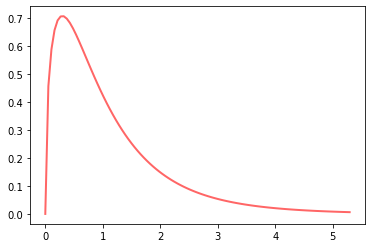

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
dfn = 3  #　分子の自由度
dfd = 16 # 分母の自由度 
x = np.linspace(stats.f.ppf(1e-10, dfn, dfd),stats.f.ppf(0.99, dfn, dfd), 100)
plt.plot(x, stats.f.pdf(x, dfn, dfd), 'r-', lw=2, alpha=0.6, label='f pdf')

### (3)有意水準$\alpha$の決定
ここでは有意水準は5%、つまり$\alpha=0.05$とする。上図のようF分布は正の値しか取らないため分散分析は常に片側検定となる。

### (4)検定統計量の実現値を求める
Pythonによる分散分析の関数は以下である。